In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_grouped_evaluation_returns

In [4]:
plt.rc('font', size=12)

In [5]:
# Original Values
# RANDOM_SCORE = -281.4462259899989
# EXPERT_SCORE = 12135.0

# Values from d4rl/d4rl/gym_mujoco/__init__.py
RANDOM_SCORE = -280.178953
EXPERT_SCORE = 12135.0

# MOPO

In [6]:
# Historical Medium-Replay
MP148 = get_results("MP148")
MP149 = get_results("MP149")

# Historical Medium-Expert
MP150 = get_results("MP150")
MP151 = get_results("MP151")

# Medium
MP521 = get_results("MP521")
MP522 = get_results("MP522")
MP523 = get_results("MP523")
MP952 = get_results("MP952")
MP953 = get_results("MP953")
MP954 = get_results("MP954")

# Medium-Replay
MP524 = get_results("MP524")
MP525 = get_results("MP525")
MP526 = get_results("MP526")
MP955 = get_results("MP955")
MP956 = get_results("MP956")
MP957 = get_results("MP957")

# Medium-Expert
# Commented results are originals - used wrong parameters
# MP527 = get_results("MP527")
# MP528 = get_results("MP528")
# MP529 = get_results("MP529")
MP964 = get_results("MP964")
MP965 = get_results("MP965")
MP966 = get_results("MP966")
MP958 = get_results("MP958")
MP959 = get_results("MP959")
MP960 = get_results("MP960")

# Random
# MP530 = get_results("MP530")
# MP531 = get_results("MP531")
# MP532 = get_results("MP532")
MP961 = get_results("MP961")
MP962 = get_results("MP962")
MP963 = get_results("MP963")
MQ176 = get_results("MQ176")
MQ177 = get_results("MQ177")
MQ178 = get_results("MQ178")

In [8]:
def determine_normalised_score(exps: list):
    final_returns = []
    for exp in exps:
        final_returns.append(exp.sac.result['evaluation/return-average'].iloc[-1])
    final_returns = np.array(final_returns)
    norm_scores = 100 * (final_returns-RANDOM_SCORE)/(EXPERT_SCORE-RANDOM_SCORE)
    return f'{np.round(norm_scores.mean(),1)}±{np.round(norm_scores.std(),1)}; {np.round(final_returns.mean(),0)}±{np.round(final_returns.std(),0)}'

In [9]:
print(f'Historical Medium-Replay: {determine_normalised_score([MP148, MP149])} - Target: 53.1±2.0')
print(f'Historical Medium-Expert: {determine_normalised_score([MP150, MP151])} - Target: 63.3±38.0')
print()
# print(f'Random: {determine_normalised_score([MP530, MP531, MP532, MP961, MP962, MP963])} - Target: 35.4±2.5')
print(f'Random: {determine_normalised_score([MP961, MP962, MP963, MQ176, MQ177, MQ178])} - Target: 35.4±2.5')
print(f'Medium: {determine_normalised_score([MP521, MP522, MP523, MP952, MP953, MP954])} - Target: 42.3±1.6')
print(f'Medium-Replay: {determine_normalised_score([MP524, MP525, MP526, MP955, MP956, MP957])} - Target: 53.1±2.0')
print(f'Medium-Expert: {determine_normalised_score([MP964, MP965, MP966, MP958, MP959, MP960])} - Target: 63.3±38.0')

Historical Medium-Replay: 52.9±4.1; 6289.0±513.0 - Target: 53.1±2.0
Historical Medium-Expert: 93.0±6.2; 11266.0±770.0 - Target: 63.3±38.0

Random: 33.9±3.2; 3926.0±403.0 - Target: 35.4±2.5
Medium: 46.5±0.8; 5489.0±100.0 - Target: 42.3±1.6
Medium-Replay: 54.8±1.9; 6527.0±230.0 - Target: 53.1±2.0
Medium-Expert: 75.0±27.5; 9030.0±3411.0 - Target: 63.3±38.0


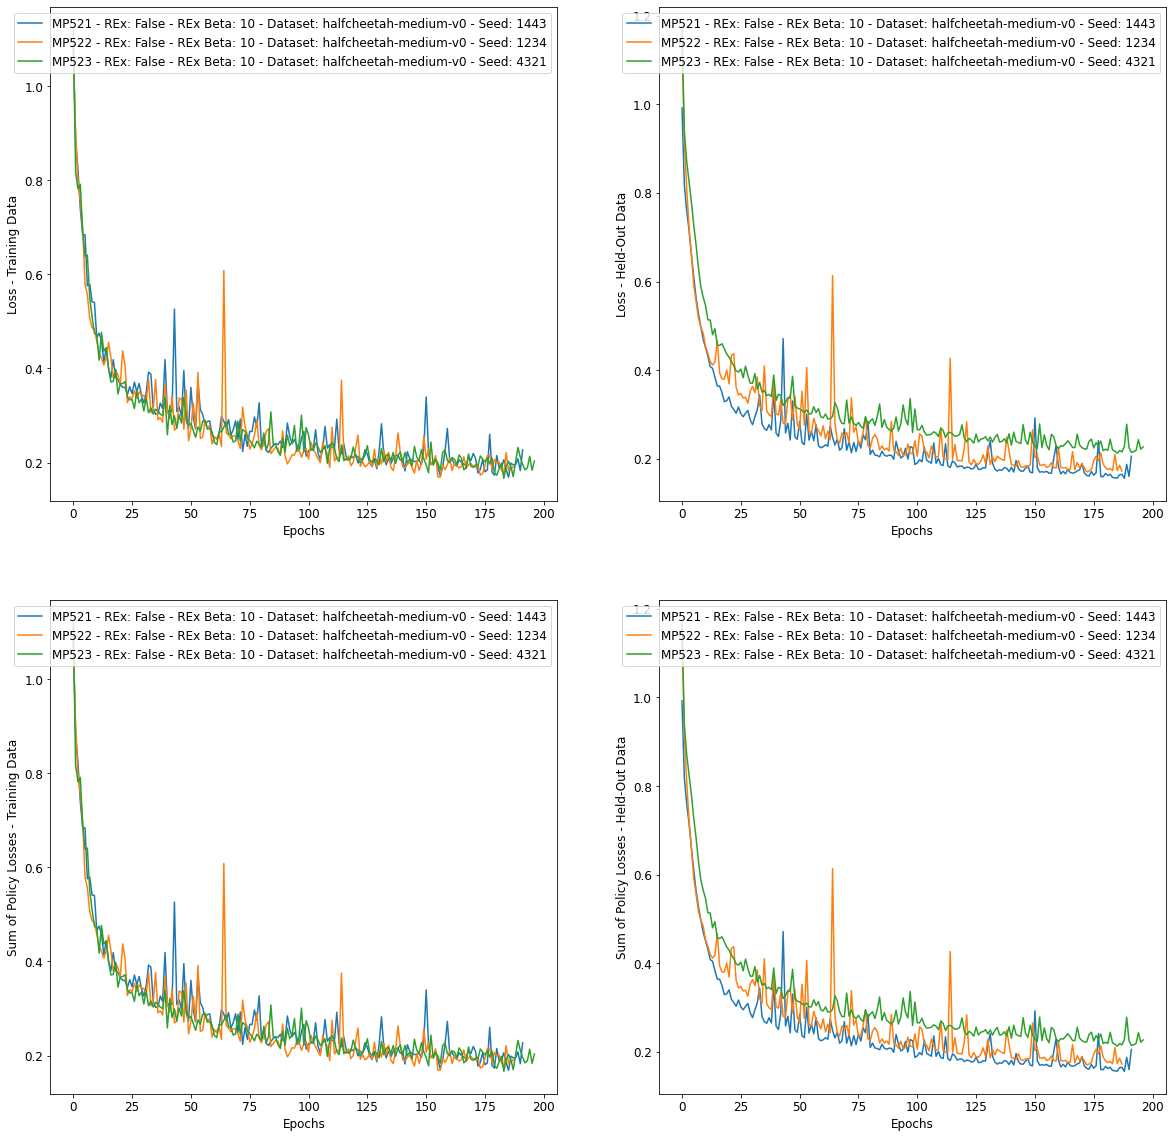

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP521,
    MP522,
    MP523
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

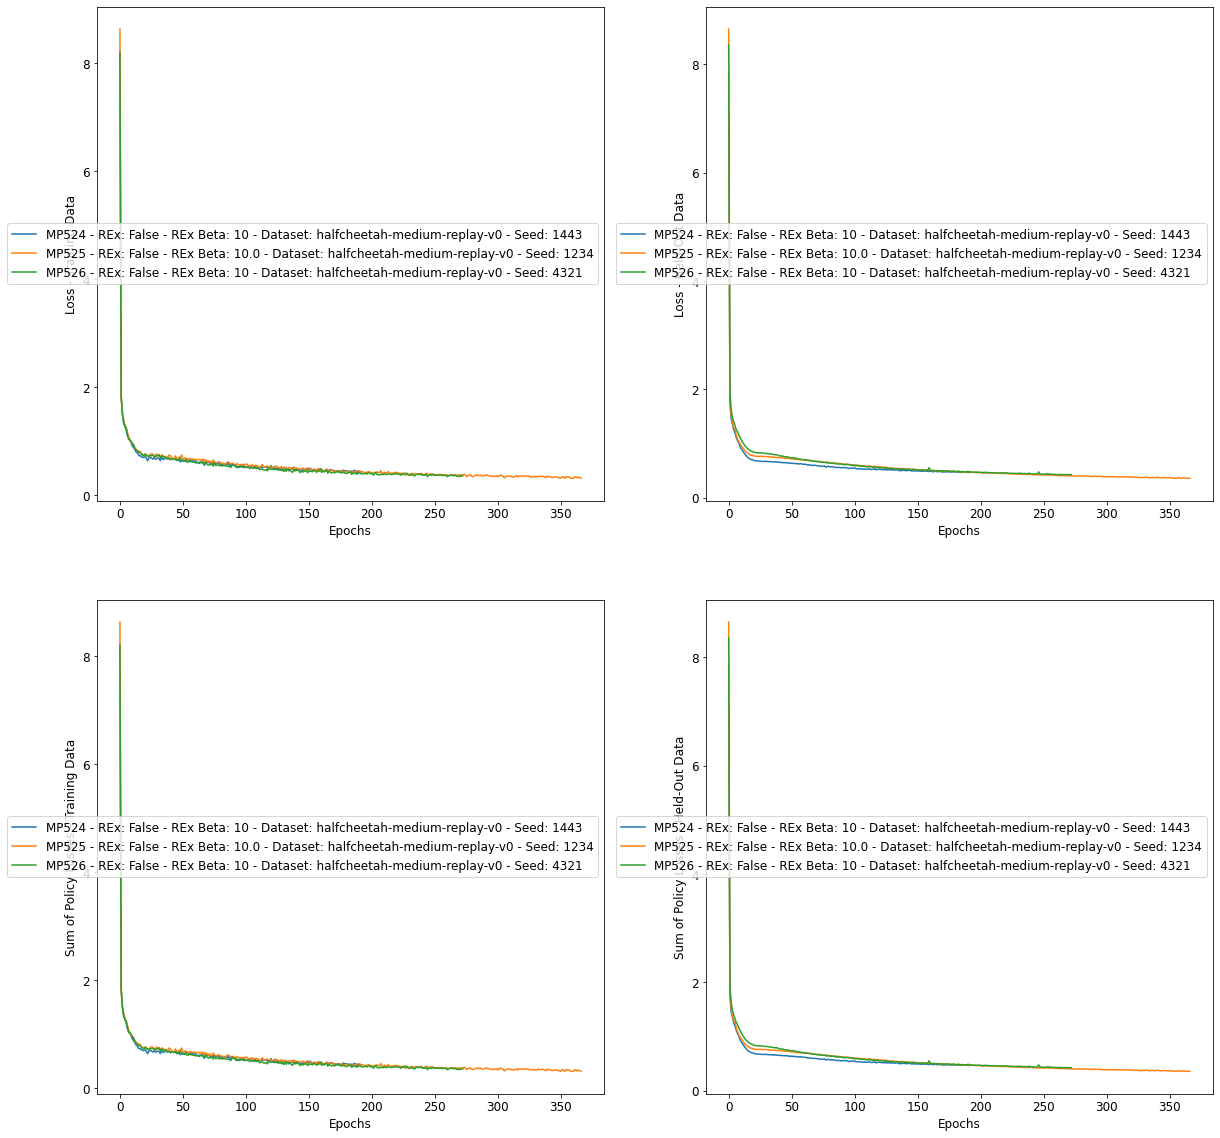

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP524,
    MP525,
    MP526
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

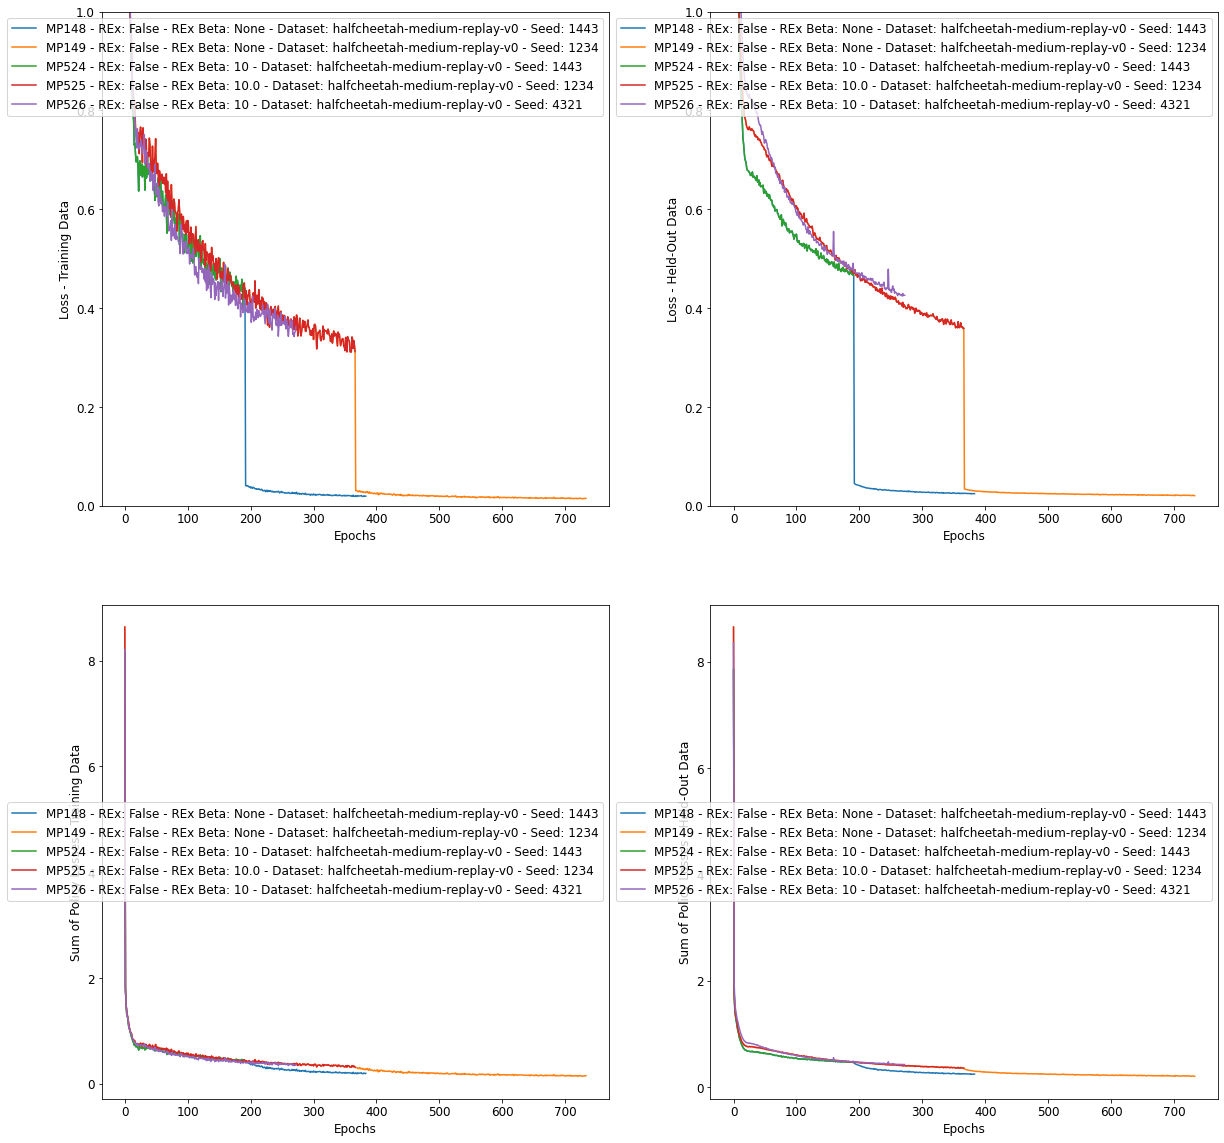

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP148,
    MP149,
    MP524,
    MP525,
    MP526
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,1.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,1.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

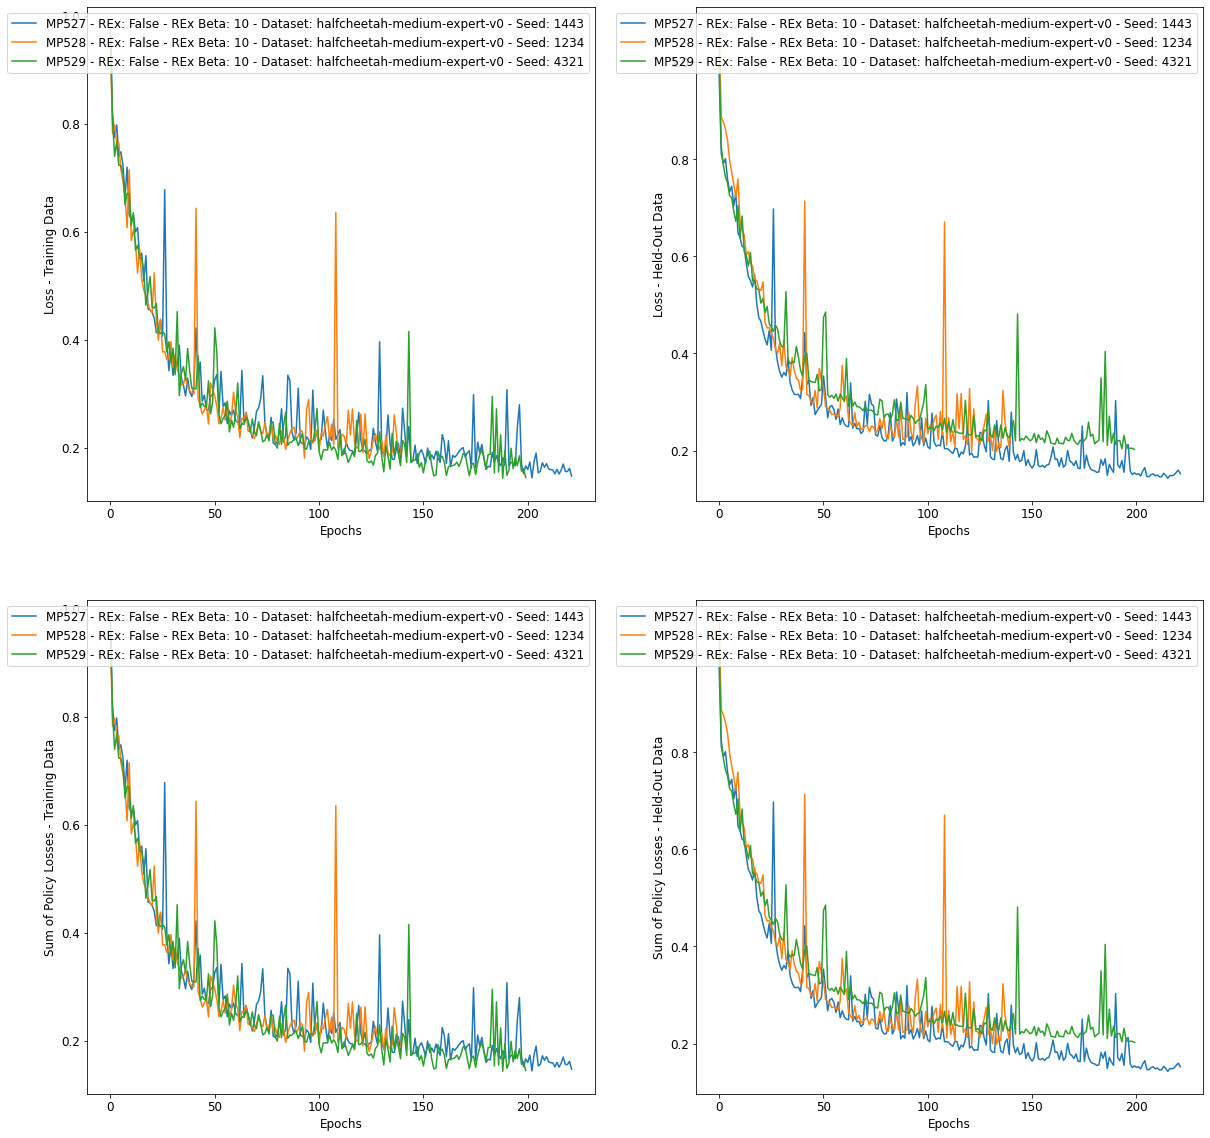

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP527,
    MP528,
    MP529
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

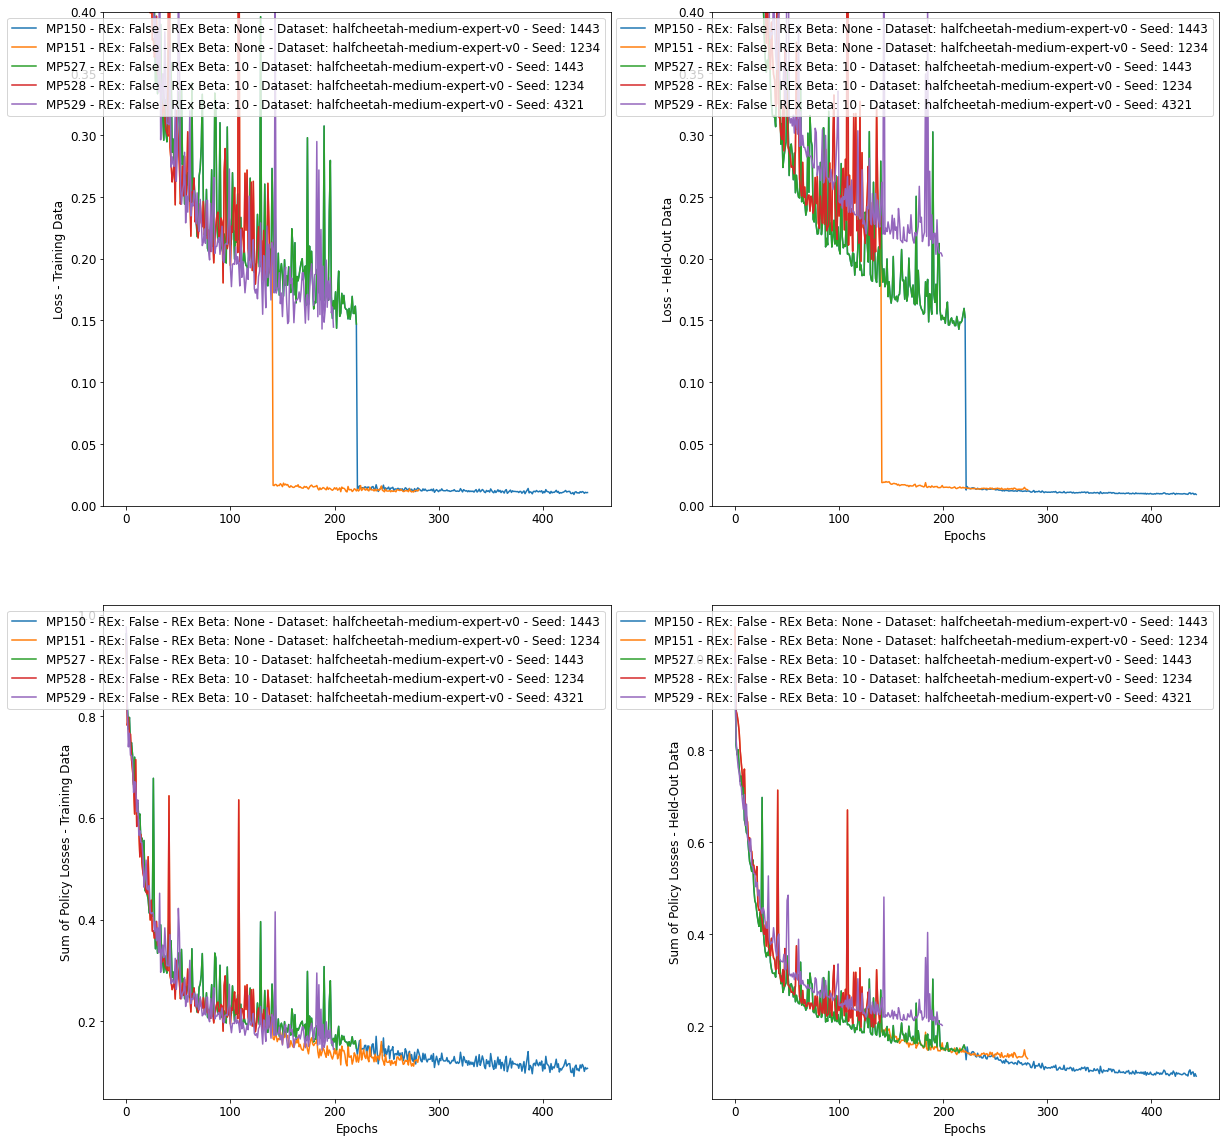

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP150,
    MP151,
    MP527,
    MP528,
    MP529
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,0.4)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,0.4)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

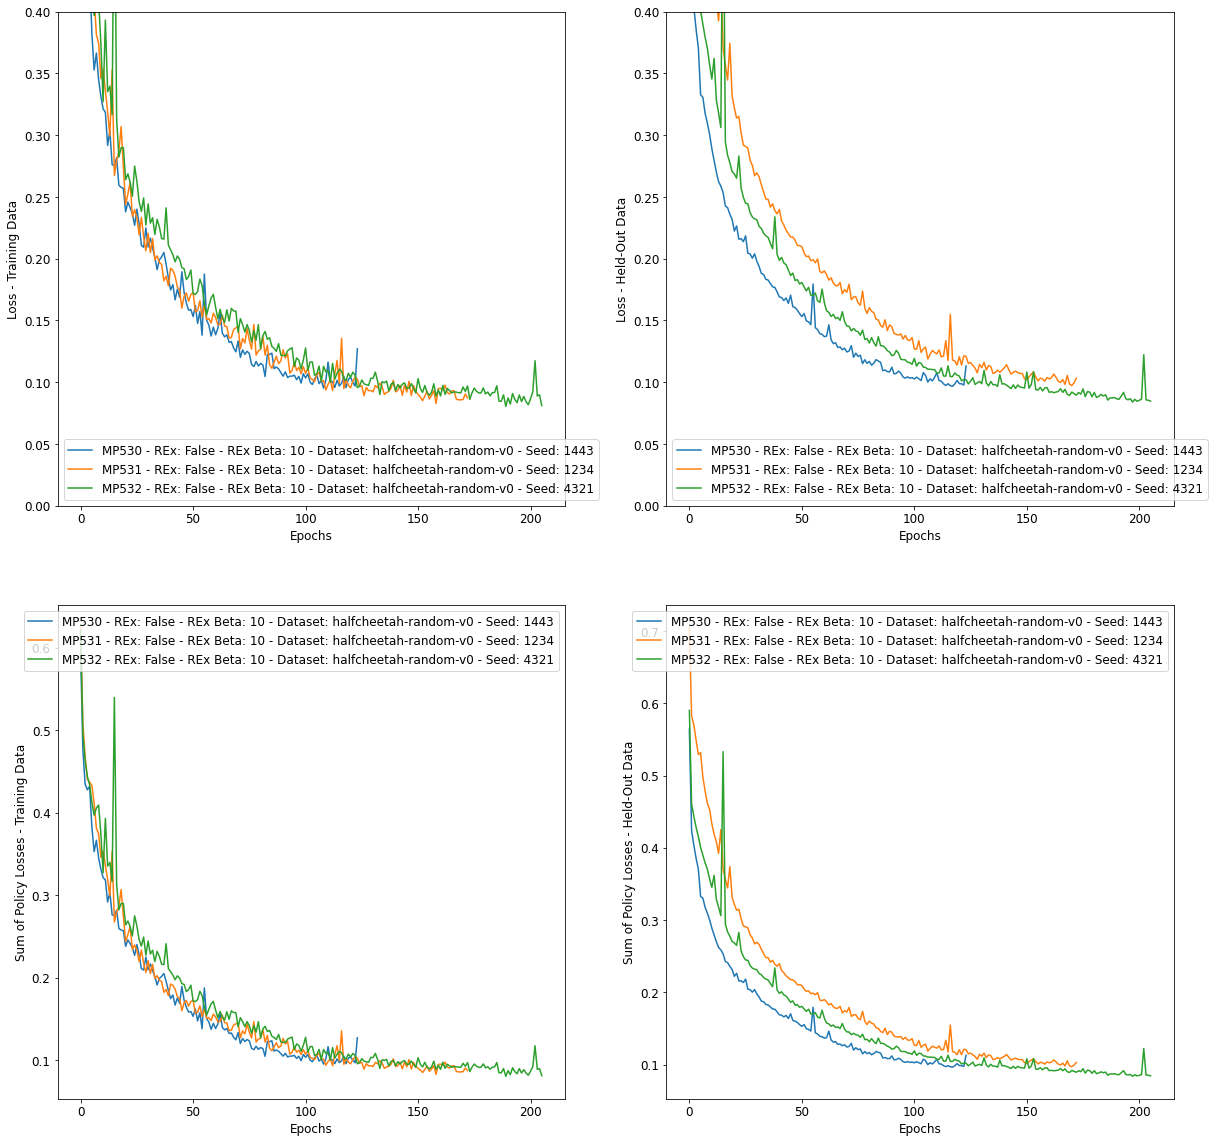

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP530,
    MP531,
    MP532
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,0.4)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,0.4)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

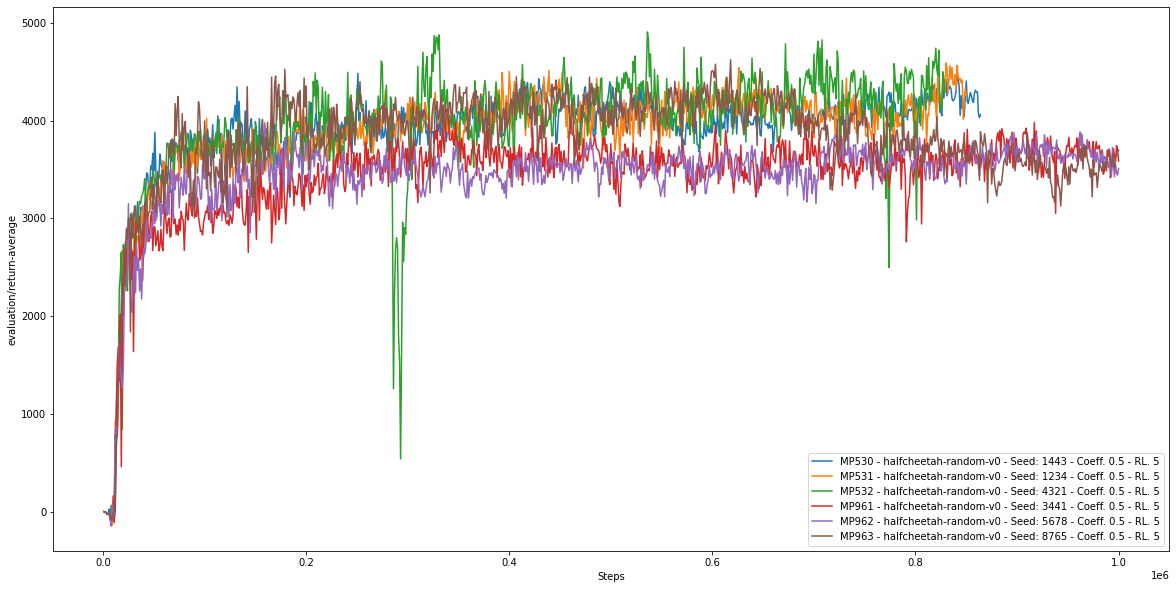

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    # # Medium
    # MP521,
    # MP522,
    # MP523,
    # MP952,
    # MP953,
    # MP954,
    # # Medium-Replay
    # MP524,
    # MP525,
    # MP526,
    # MP955,
    # MP956,
    # MP957,
    # # Medium Expert
    # MP964,
    # MP965,
    # MP966,
    # MP958,
    # MP959,
    # MP960,
    # Random
    # MP530,
    # MP531,
    # MP532,
    MP961,
    MP962,
    MP963,
    MQ176,
    MQ177,
    MQ178,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed} - Coeff. {exp.penalty_coeff} - RL. {exp.rollout_length}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Medium': {'mean': 5491, 'std': 108},
 'Medium-Replay': {'mean': 6691, 'std': 218},
 'Medium-Expert': {'mean': 9030, 'std': 3411},
 'Random': {'mean': 3926, 'std': 403}}

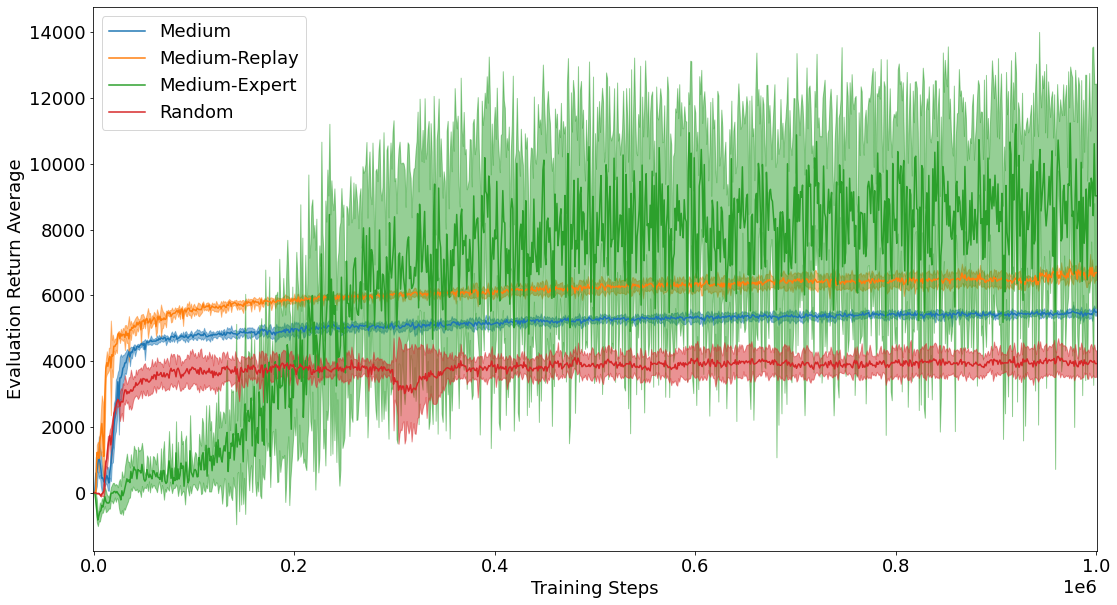

In [11]:
plot_grouped_evaluation_returns([
    ((MP521, MP522, MP523, MP952, MP953, MP954), 'Medium'),
    ((MP524, MP525, MP526, MP955, MP956, MP957), 'Medium-Replay'),
    ((MP964, MP965, MP966, MP958, MP959, MP960), 'Medium-Expert'),
    # ((MP530, MP531, MP532, MP961, MP962, MP963), 'Random'),
    ((MP961, MP962, MP963, MQ176, MQ177, MQ178), 'Random'),
], xmax=1001000, show_ends=False, save_path='ch3/mopo_baseline_results.png')

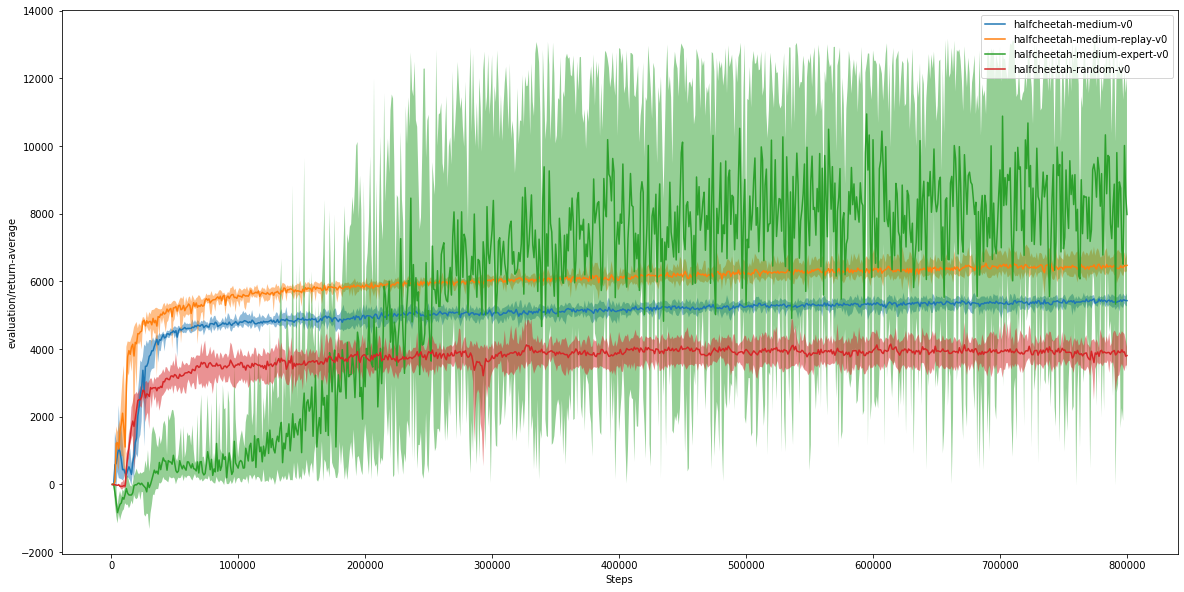

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set in [
    (MP521, MP522, MP523, MP952, MP953, MP954),
    (MP524, MP525, MP526, MP955, MP956, MP957),
    (MP964, MP965, MP966, MP958, MP959, MP960),
    # (MP530, MP531, MP532, MP961, MP962, MP963),
    (MP961, MP962, MP963, MQ176, MQ177, MQ178),
]:
    stacked_data = np.vstack([i.sac.result[feature][:800] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'][:800], mean_vals, label=f'{exp_set[0].dataset}')
    ax.fill_between(exp.sac.result['timesteps_total'][:800], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

# MBPO

In [11]:
# Medium
MP928 = get_results("MP928")
MP929 = get_results("MP929")
MP930 = get_results("MP930")
MP940 = get_results("MP940")
MP941 = get_results("MP941")
MP942 = get_results("MP942")

# Medium-Replay
MP931 = get_results("MP931")
MP932 = get_results("MP932")
MP933 = get_results("MP933")
MP943 = get_results("MP943")
MP944 = get_results("MP944")
MP945 = get_results("MP945")

# Medium-Expert
MP934 = get_results("MP934")
MP935 = get_results("MP935")
MP936 = get_results("MP936")
MP946 = get_results("MP946")
MP947 = get_results("MP947")
MP948 = get_results("MP948")

# Random
MP937 = get_results("MP937")
MP938 = get_results("MP938")
MP939 = get_results("MP939")
MP949 = get_results("MP949")
MP950 = get_results("MP950")
MP951 = get_results("MP951")

In [12]:
print(f'Random: {determine_normalised_score([MP937, MP938, MP939, MP949, MP950, MP951])} - Target: 30.7±3.9')
print(f'Medium: {determine_normalised_score([MP928, MP929, MP930, MP940, MP941, MP942])} - Target: 28.3±22.7')
print(f'Medium-Replay: {determine_normalised_score([MP931, MP932, MP933, MP943, MP944, MP945])} - Target: 47.3±12.6')
print(f'Medium-Expert: {determine_normalised_score([MP934, MP935, MP936, MP946, MP947, MP948])} - Target: 9.7±9.5')

Random: 37.3±3.2 - Target: 30.7±3.9
Medium: 44.6±10.6 - Target: 28.3±22.7
Medium-Replay: 53.4±3.9 - Target: 47.3±12.6
Medium-Expert: 61.6±30.0 - Target: 9.7±9.5


MP928 - 750000
MP929 - 747000
MP930 - 738000
MP936 - 730000
MP938 - 775000
MP939 - 728000


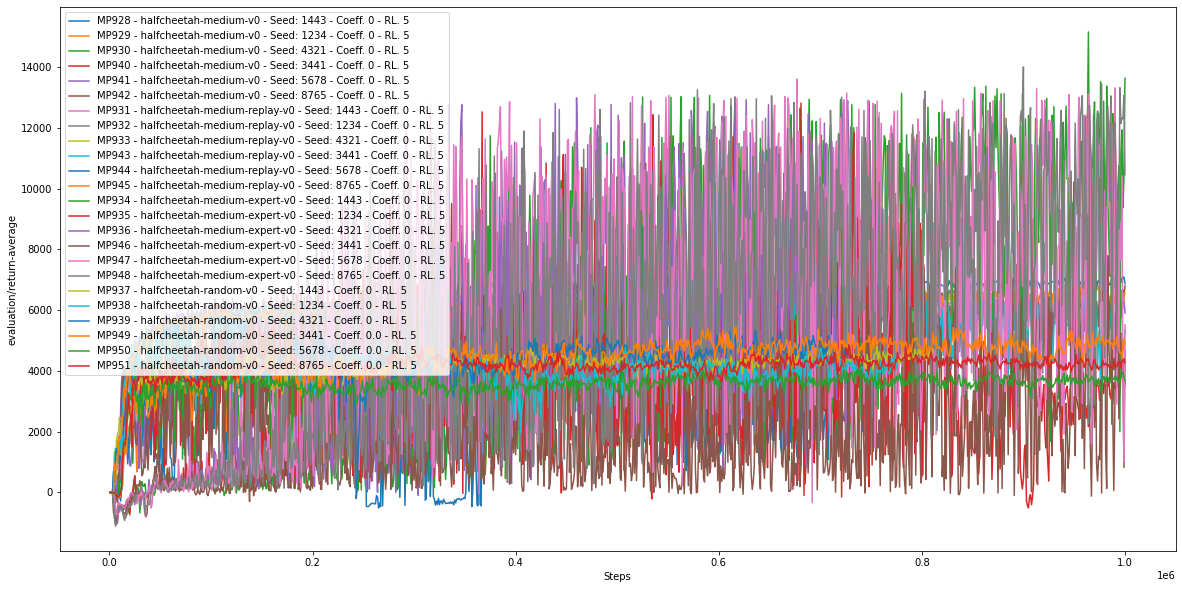

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    # Medium
    MP928,
    MP929,
    MP930,
    MP940,
    MP941,
    MP942,
    # Medium-Replay
    MP931,
    MP932,
    MP933,
    MP943,
    MP944,
    MP945,
    # Medium-Expert
    MP934,
    MP935,
    MP936,
    MP946,
    MP947,
    MP948,
    # Random
    MP937,
    MP938,
    MP939,
    MP949,
    MP950,
    MP951,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed} - Coeff. {exp.penalty_coeff} - RL. {exp.rollout_length}'
    )
    if exp.sac.result["timesteps_total"].values[-1] < 800000:
        print(f'{exp.name} - {exp.sac.result["timesteps_total"].values[-1]}')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

MP928 - 750000
MP929 - 747000
MP930 - 738000
MP936 - 730000
MP938 - 775000
MP939 - 728000


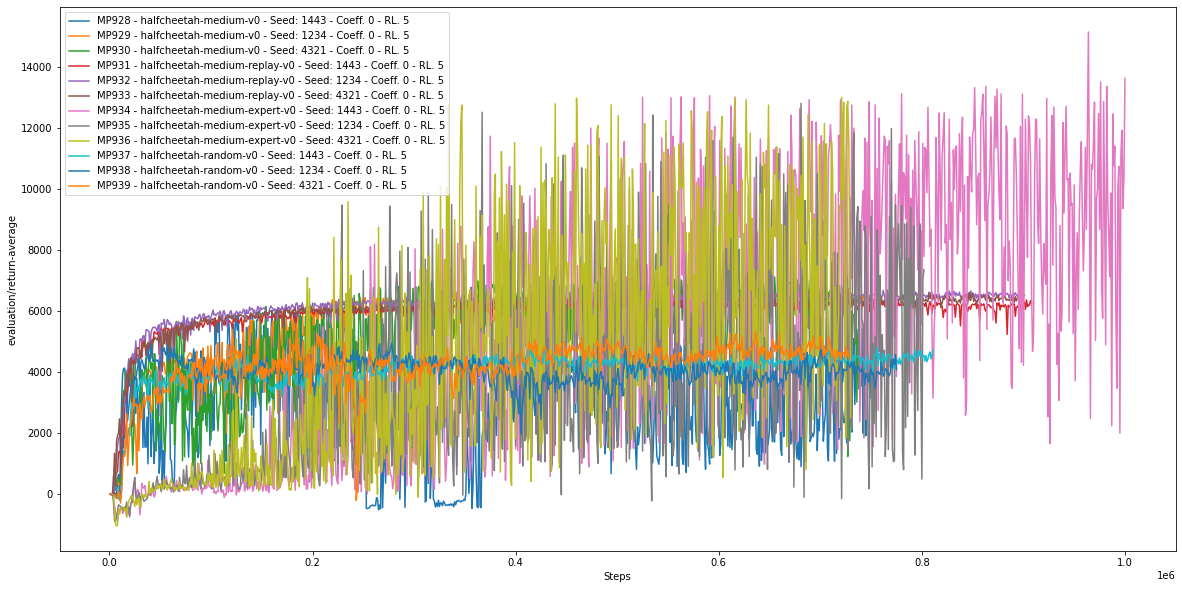

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    # Medium
    MP928,
    MP929,
    MP930,
    # Medium-Replay
    MP931,
    MP932,
    MP933,
    # Medium-Expert
    MP934,
    MP935,
    MP936,
    # Random
    MP937,
    MP938,
    MP939,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed} - Coeff. {exp.penalty_coeff} - RL. {exp.rollout_length}'
    )
    if exp.sac.result["timesteps_total"].values[-1] < 800000:
        print(f'{exp.name} - {exp.sac.result["timesteps_total"].values[-1]}')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

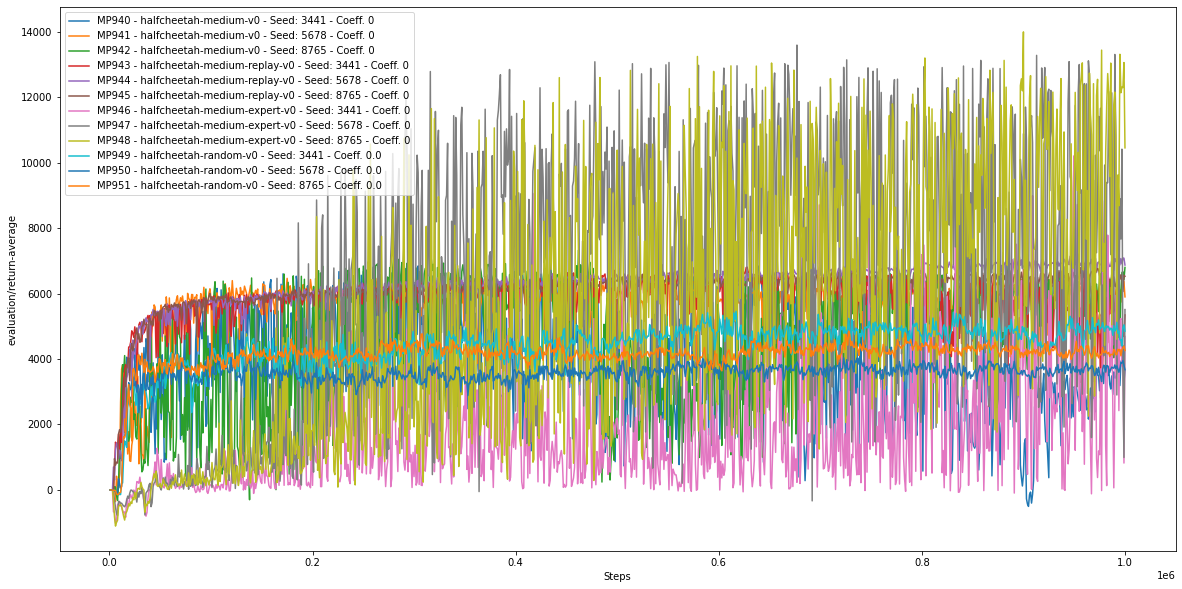

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    # Medium
    MP940,
    MP941,
    MP942,
    # Medium-Replay
    MP943,
    MP944,
    MP945,
    # Medium-Expert
    MP946,
    MP947,
    MP948,
    # Random
    MP949,
    MP950,
    MP951,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed} - Coeff. {exp.penalty_coeff}'
    )
    if exp.sac.result["timesteps_total"].values[-1] < 800000:
        print(f'{exp.name} - {exp.sac.result["timesteps_total"].values[-1]}')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Medium': {'mean': 5449.477213541667, 'std': 1328.9937658831875},
 'Medium-Replay': {'mean': 6252.83251953125, 'std': 653.2611930167811},
 'Medium-Expert': {'mean': 8574.929321289062, 'std': 3661.5398870767485},
 'Random': {'mean': 4265.137451171875, 'std': 480.74086741199585}}

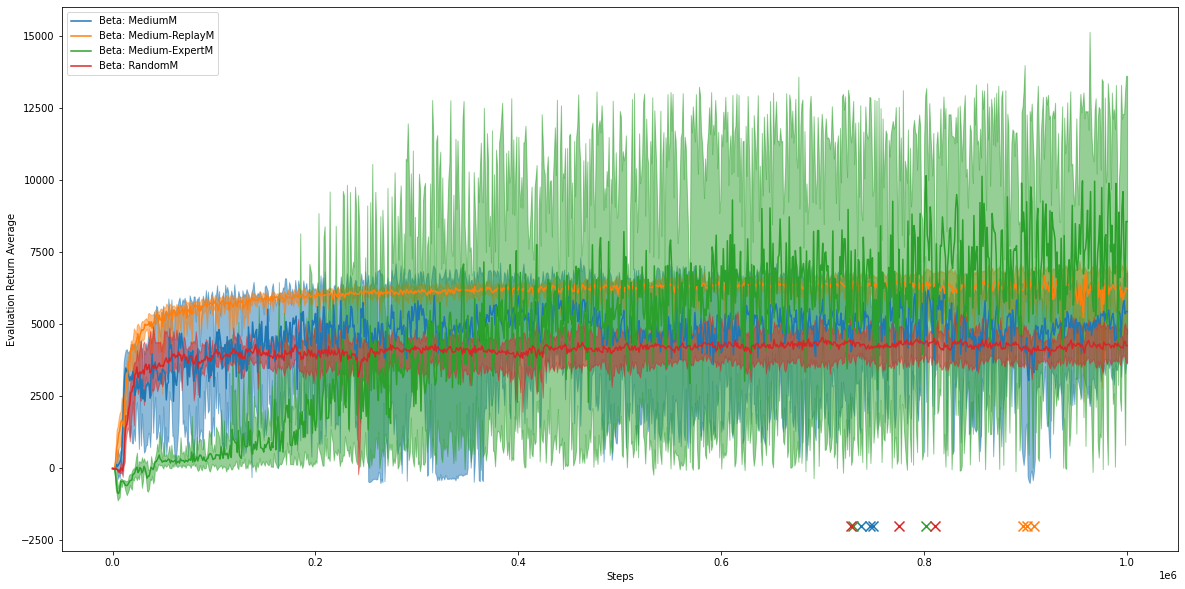

In [17]:
plot_grouped_evaluation_returns([
    ((MP928, MP929, MP930, MP940, MP941, MP942), 'Medium'),
    ((MP931, MP932, MP933, MP943, MP944, MP945), 'Medium-Replay'),
    ((MP934, MP935, MP936, MP946, MP947, MP948), 'Medium-Expert'),
    ((MP937, MP938, MP939, MP949, MP950, MP951), 'Random'),
])

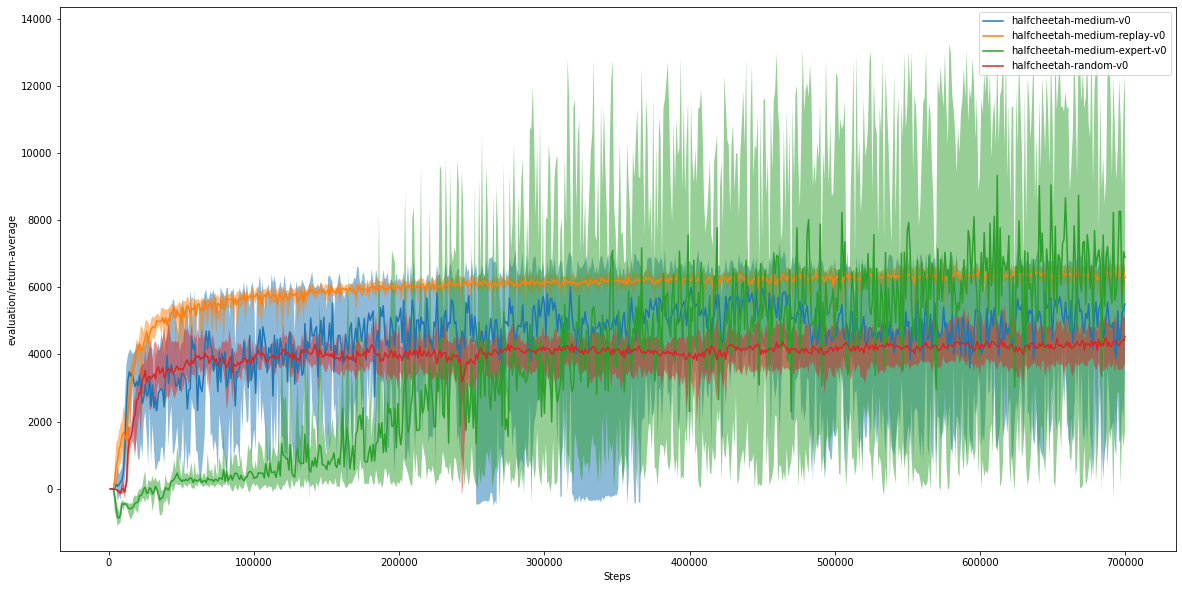

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set in [
    (MP928, MP929, MP930, MP940, MP941, MP942),
    (MP931, MP932, MP933, MP943, MP944, MP945),
    (MP934, MP935, MP936, MP946, MP947, MP948),
    (MP937, MP938, MP939, MP949, MP950, MP951),
]:
    stacked_data = np.vstack([i.sac.result[feature][:700] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'][:700], mean_vals, label=f'{exp_set[0].dataset}')
    ax.fill_between(exp.sac.result['timesteps_total'][:700], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass